In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q supervision
!pip install huggingface_hub  


In [3]:
import cv2
import supervision as sv # pip install supervision
from ultralytics import YOLOv10


image 1/1 C:\Users\Admin\Desktop\DocSegment.Ai\yolov10\input_sample.png: 640x512 1 Caption, 7 List-items, 1 Picture, 2 Section-headers, 5 Texts, 2623.5ms
Speed: 13.0ms preprocess, 2623.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


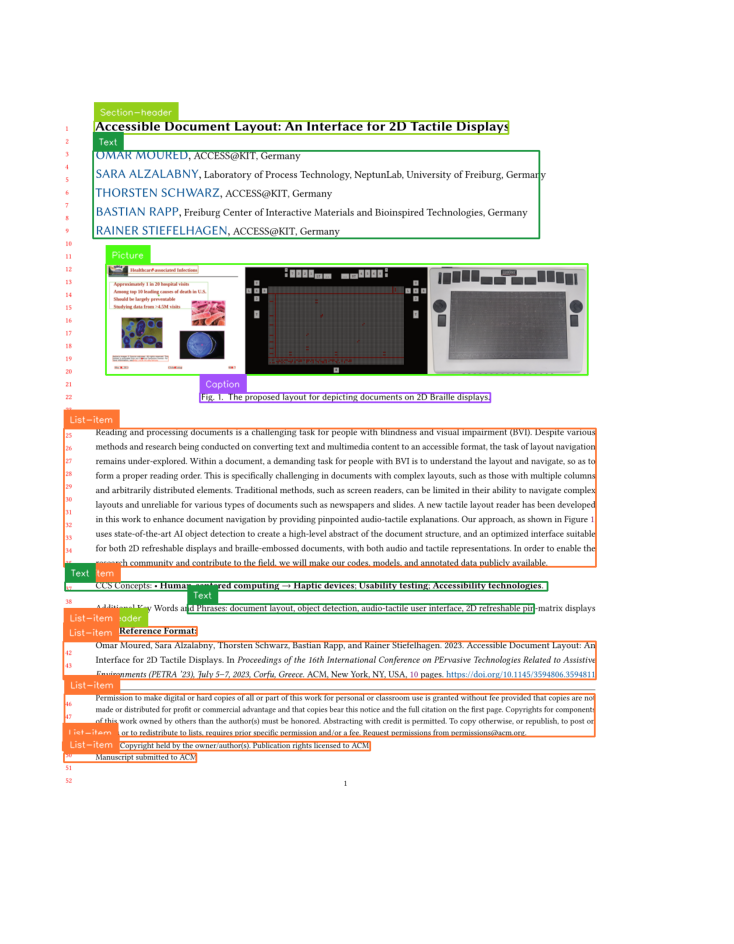

In [35]:
# modify the path to model's weights.

model = YOLOv10('yolov10x_best.pt')
image = cv2.imread('input_sample.png')

results = model(source='input_sample.png', conf=0.2, iou=0.8)[0]
# show results with "supervision" library

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


image 1/1 C:\Users\Admin\Desktop\DocSegment.Ai\yolov10\2.jpg: 640x448 1 Caption, 4 List-items, 1 Page-footer, 2 Page-headers, 1 Picture, 8 Section-headers, 55 Texts, 2443.0ms
Speed: 9.0ms preprocess, 2443.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


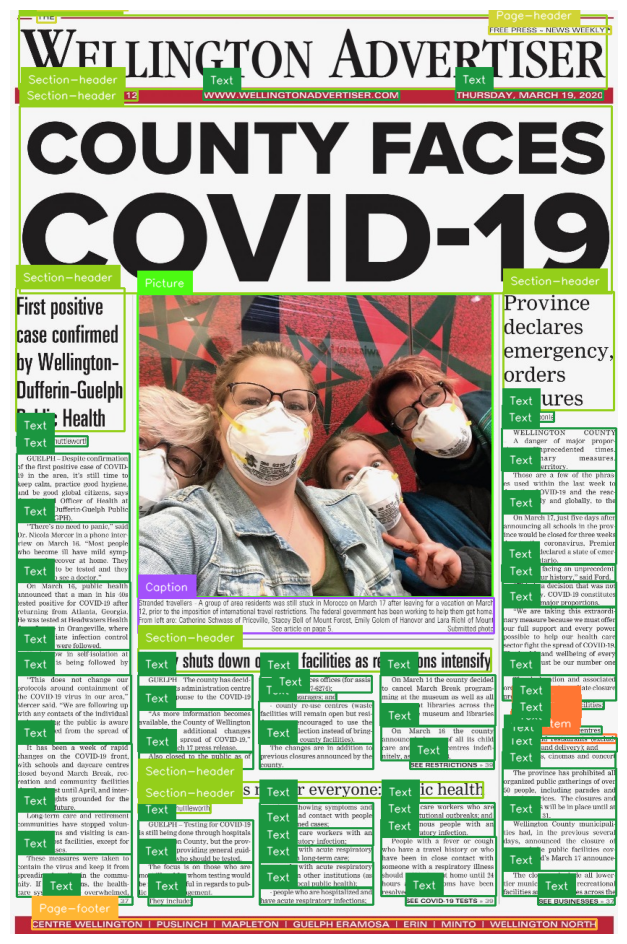

In [37]:
import cv2
from ultralytics import YOLO
import supervision as sv

# Load the YOLOv10 model
model = YOLO('yolov10x_best.pt')

# Read the input image
image = cv2.imread('2.jpg')

# Run inference on the image
results = model(source='2.jpg', conf=0.2, iou=0.8)[0]

# Convert results to supervision detections
detections = sv.Detections.from_ultralytics(results)

# Annotate the image with bounding boxes and labels
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Save the annotated image
cv2.imwrite('2.jpg', annotated_image)

# Optional: Display the saved image to verify
sv.plot_image(annotated_image)


In [29]:
!pip install pdf2image  


In [31]:
from ultralytics import YOLOv10
import cv2
import supervision as sv
from pdf2image import convert_from_path
import numpy as np
import os

def load_image(file_path):
    if file_path.lower().endswith('.pdf'):
        pages = convert_from_path(file_path)
        if pages:
            return np.array(pages[0])[:, :, ::-1]  # Convert to BGR (OpenCV format)
        else:
            raise ValueError("No pages found in PDF.")
    elif file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        return cv2.imread(file_path)
    else:
        raise ValueError("Unsupported file format. Use PDF or image (png, jpg, jpeg).")

model = YOLOv10('yolov10x_best.pt')

input_path = 'Iris_CompteRendu.pdf'  # Change to your input path (image or PDF)
image = load_image(input_path)

results = model(source=input_path, conf=0.2, iou=0.8)[0]

# Show results with "supervision" library
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?